In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
tspa_raw_df = pd.read_csv("../../raw_data/TSPA.csv",  header=None)
tspb_raw_df = pd.read_csv("../../raw_data/TSPB.csv",  header=None)

# Instance A

In [21]:
experiment_summary_a_greedy = pd.read_csv("../Results/GreedyHeuristics/TSPA/experiment_summary.csv")
experiment_summary_a_greedy_regret_2080 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPA_2080/experiment_summary.csv")
experiment_summary_a_greedy_regret_5050 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPA_5050/experiment_summary.csv")
experiment_summary_a_greedy_regret_8020 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPA_8020/experiment_summary.csv")


In [22]:
experiment_summary_a_greedy


Instance                       Method  MinCost  MaxCost    AvgCost  \
0     TSPA               RandomSolution   232222   291123  264089.38   
1     TSPA       NearestNeighborEndOnly    91417   117672  105332.36   
2     TSPA  NearestNeighborAllPositions    71773    73894   72628.65   
3     TSPA                  GreedyCycle    71488    74350   72572.07   

   NumSolutions  BestSolutionID  
0           100              49  
1           100              49  
2           100              74  
3           100              62

In [23]:
experiment_summary_a_greedy_regret_2080

Instance                Method  MinCost  MaxCost    AvgCost  NumSolutions  \
0  TSPA_2080  greedy2RegretNearest   107766   126860  115823.54           100   
1  TSPA_2080  greedyWeightedRegret    71525    73889   72472.89           100   

   BestSolutionID  
0              16  
1               1

In [24]:
experiment_summary_a_greedy_regret_5050

Instance                Method  MinCost  MaxCost    AvgCost  NumSolutions  \
0  TSPA_5050  greedy2RegretNearest   107766   126860  115823.54           100   
1  TSPA_5050  greedyWeightedRegret    71108    73321   72138.47           100   

   BestSolutionID  
0              16  
1               1

In [25]:
methods_to_clean = [experiment_summary_a_greedy_regret_5050, experiment_summary_a_greedy_regret_8020]
for method_df in methods_to_clean:
    method_df.drop(method_df[method_df['Method'] == 'greedy2RegretNearest'].index, inplace=True)

In [26]:
experiment_summary_a_greedy_regret_8020

Instance                Method  MinCost  MaxCost   AvgCost  NumSolutions  \
1  TSPA_8020  greedyWeightedRegret    72128    77674  75553.42           100   

   BestSolutionID  
1               1

In [27]:
experiment_summary_a_combined_regret = pd.concat([experiment_summary_a_greedy_regret_2080, 
                                           experiment_summary_a_greedy_regret_5050, experiment_summary_a_greedy_regret_8020], ignore_index=True)

In [28]:
experiment_summary_a_combined_regret

Instance                Method  MinCost  MaxCost    AvgCost  NumSolutions  \
0  TSPA_2080  greedy2RegretNearest   107766   126860  115823.54           100   
1  TSPA_2080  greedyWeightedRegret    71525    73889   72472.89           100   
2  TSPA_5050  greedyWeightedRegret    71108    73321   72138.47           100   
3  TSPA_8020  greedyWeightedRegret    72128    77674   75553.42           100   

   BestSolutionID  
0              16  
1               1  
2               1  
3               1

In [35]:
def load_solution_heuristics(instance_name,method, solution_id):
    file_path = f"../Results/{instance_name}/{instance_name}_{method}_solutions.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path} does not exist.")
        return None

In [36]:
solutions_A_heuristics = pd.DataFrame()
for method in experiment_summary_a_greedy['Method'].unique():
    method_data = experiment_summary_a_greedy[experiment_summary_a_greedy['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_heuristics("TSPA", method, best_solution_id)
    solutions_A_heuristics = pd.concat([solutions_A_heuristics, solution], ignore_index=True)

solutions_A_heuristics

RandomSolution: Best Solution ID = 49
NearestNeighborEndOnly: Best Solution ID = 49
NearestNeighborAllPositions: Best Solution ID = 74
GreedyCycle: Best Solution ID = 62


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          49     272407       100         177054             449461   
1          49      95505       100          33236             128741   
2          74      71488       100          23578              95066   
3          62      72639       100          24161              96800   

                                               Cycle  
0  177-142-12-160-149-11-175-47-4-176-37-173-19-1...  
1  124-94-63-53-180-154-97-152-1-101-86-75-120-2-...  
2  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
3  92-57-52-185-119-40-196-81-90-165-106-178-3-14...

In [44]:
def load_solution_regret(instance_name,method, solution_id, weight):
    file_path = f"../Results/GreedyRegretHeuristics/{instance_name}_{weight}/{instance_name}_{weight}_{method}_solutions.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path} does not exist.")
        return None

In [45]:
solutions_A_regret = pd.DataFrame()
for method in experiment_summary_a_combined_regret['Method'].unique():
    method_data = experiment_summary_a_combined_regret[experiment_summary_a_combined_regret['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    weights = ['2080', '5050', '8020']
    for weight in weights:
       print(f"{method}_{weight}: Best Solution ID = {best_solution_id}")
       solution = load_solution_regret("TSPA", method, best_solution_id, weight)
       solutions_A_regret = pd.concat([solutions_A_regret, solution], ignore_index=True) 
        

solutions_A_regret

greedy2RegretNearest_2080: Best Solution ID = 16
greedy2RegretNearest_5050: Best Solution ID = 16
greedy2RegretNearest_8020: Best Solution ID = 16
greedyWeightedRegret_2080: Best Solution ID = 1
greedyWeightedRegret_5050: Best Solution ID = 1
greedyWeightedRegret_8020: Best Solution ID = 1


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          16     107766       100          22778             130544   
1          16     107766       100          22778             130544   
2          16     107766       100          22778             130544   
3           1      71525       100          23546              95071   
4           1      71108       100          22981              94089   
5           1      72128       100          22285              94413   

                                               Cycle  
0  15-64-186-23-89-183-153-0-46-198-115-197-65-14...  
1  15-64-186-23-89-183-153-0-46-198-115-197-65-14...  
2  15-64-186-23-89-183-153-0-46-198-115-197-65-14...  
3  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
4  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
5  0-117-93-140-68-46-115-139-41-193-159-18-22-14...

In [48]:
solutions_A_regret = solutions_A_regret.drop([0, 1]).reset_index(drop=True)
solutions_A_regret

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          16     107766       100          22778             130544   
1           1      71525       100          23546              95071   
2           1      71108       100          22981              94089   
3           1      72128       100          22285              94413   

                                               Cycle  
0  15-64-186-23-89-183-153-0-46-198-115-197-65-14...  
1  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
2  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
3  0-117-93-140-68-46-115-139-41-193-159-18-22-14...

In [54]:
solutions_a_final = pd.concat([solutions_A_regret, solutions_A_heuristics], ignore_index=True) 
solutions_a_final

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          16     107766       100          22778             130544   
1           1      71525       100          23546              95071   
2           1      71108       100          22981              94089   
3           1      72128       100          22285              94413   
4          49     272407       100         177054             449461   
5          49      95505       100          33236             128741   
6          74      71488       100          23578              95066   
7          62      72639       100          24161              96800   

                                               Cycle  
0  15-64-186-23-89-183-153-0-46-198-115-197-65-14...  
1  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
2  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
3  0-117-93-140-68-46-115-139-41-193-159-18-22-14...  
4  177-142-12-160-149-11-175-47-4-176-37-173-19-1...  
5  124-94-63-53-180-154-97-152-1-101-86-75-120-2-...  
6  0-46-68-139-193-41-115-5-42-181-159-69-108-18-...  
7  92-57-52-185-119-40-196-81-90-165-106-178-3-14...

In [52]:
coords = tspa_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

In [53]:
def plot_solution(instance, method, solution_data):
    """
    Plot a TSP solution showing the cycle and nodes.
    
    Parameters:
    instance: str - 'TSPA' or 'TSPB'
    method: str - Method name or 'Checker'
    solution_data: dict or pandas.Series - Solution data containing cycle information
    """
    if instance == 'TSPA':
        df = tspa_raw_df
    else: 
        df = tspb_raw_df
    
    coords = df.iloc[:, 0].str.split(';', expand=True)
    x_coords = coords[0].astype(int)
    y_coords = coords[1].astype(int)
    costs = coords[2].astype(int)
    
    if isinstance(solution_data, dict):
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    else: 
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    
    cycle_nodes = [int(x) for x in cycle_str.split('-')]
    
    highlight_x = x_coords[cycle_nodes]
    highlight_y = y_coords[cycle_nodes]
    
    plt.figure(figsize=(14, 10))
    
    unselected_mask = ~x_coords.index.isin(cycle_nodes)
    plt.scatter(x_coords[unselected_mask], y_coords[unselected_mask], 
               alpha=0.8, s=20, color='gray', label='Unselected nodes')
    
    selected_costs = costs[cycle_nodes]
    scatter = plt.scatter(highlight_x, highlight_y, 
                         c=selected_costs, cmap='Greens', 
                         alpha=0.9, s=50, label='Selected nodes (100)',
                         edgecolors='black', linewidths=0.5)
    
    first_node_idx = cycle_nodes[0]
    plt.scatter(x_coords[first_node_idx], y_coords[first_node_idx], 
               c=costs[first_node_idx], cmap='Greens', 
               alpha=0.9, s=50,
               edgecolors='red', linewidths=2)
    
    # Add cost labels for selected nodes
    for node_idx in cycle_nodes:
        plt.annotate(str(costs[node_idx]), 
                    (x_coords[node_idx], y_coords[node_idx]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    for j in range(len(cycle_nodes)):
        current_node = cycle_nodes[j]
        next_node = cycle_nodes[(j + 1) % len(cycle_nodes)] 
        
        plt.plot([x_coords[current_node], x_coords[next_node]], 
                 [y_coords[current_node], y_coords[next_node]], 
                 'b-', alpha=0.4, linewidth=0.8)
    
    plt.colorbar(scatter, label='Node Cost')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{instance} Dataset - {method} Solution\n'
              f'Objective: {objective}, '
              f'Cost: {total_cost}, '
              f'Distance: {total_distance}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


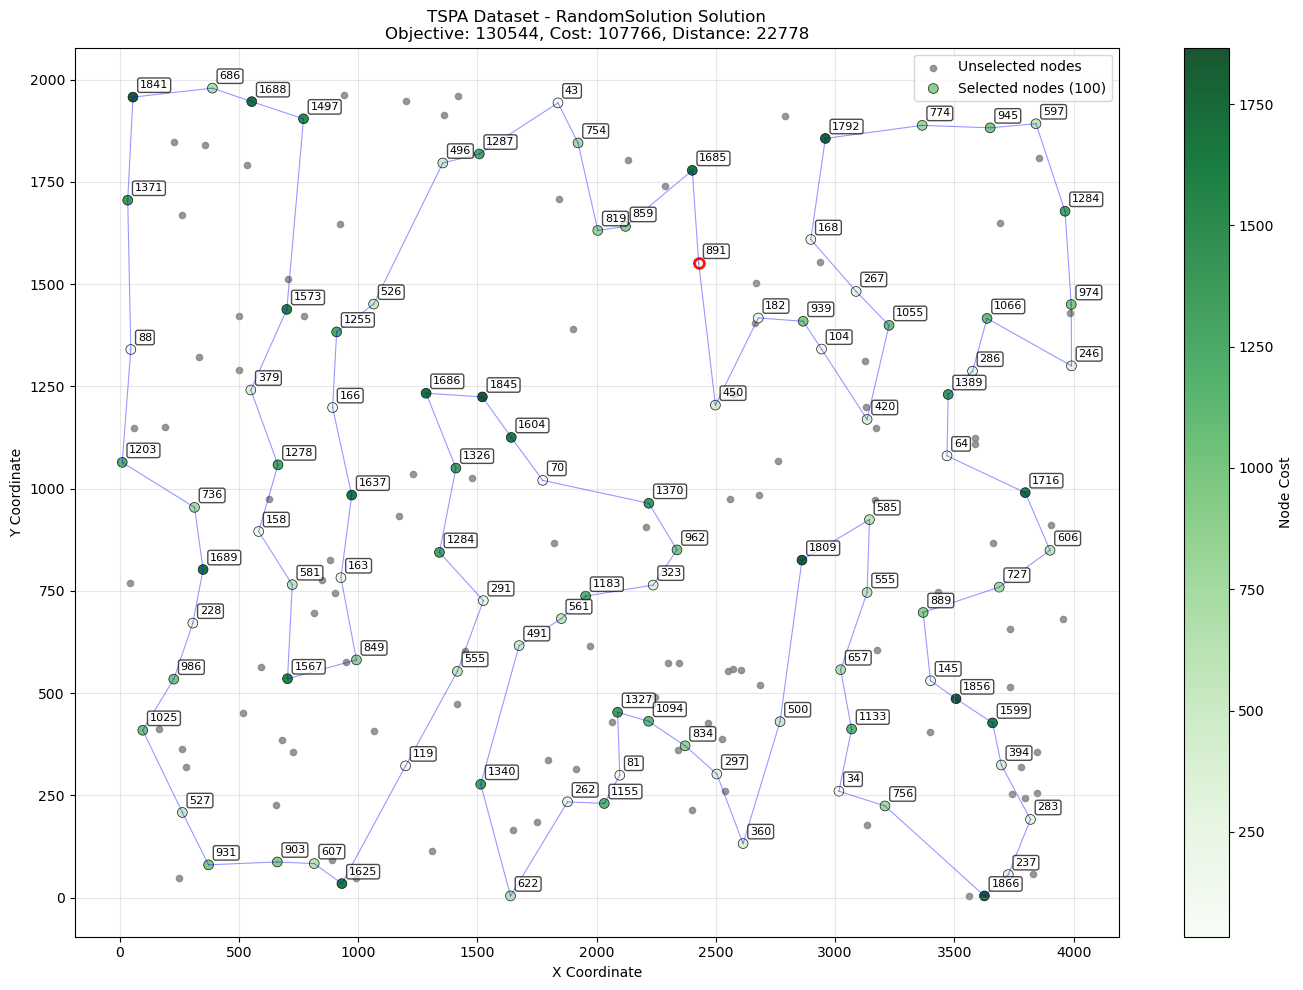

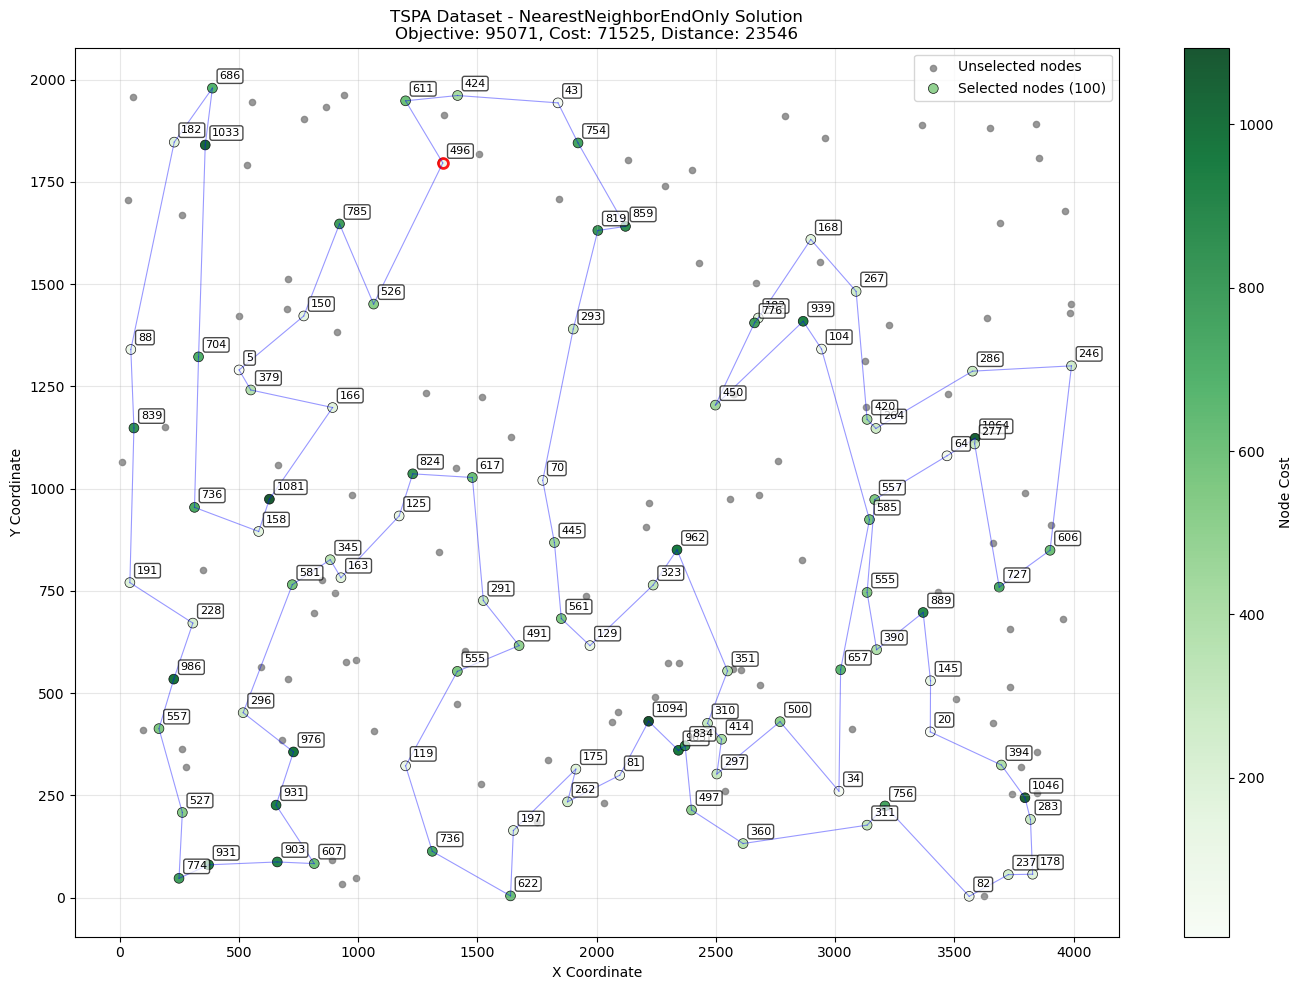

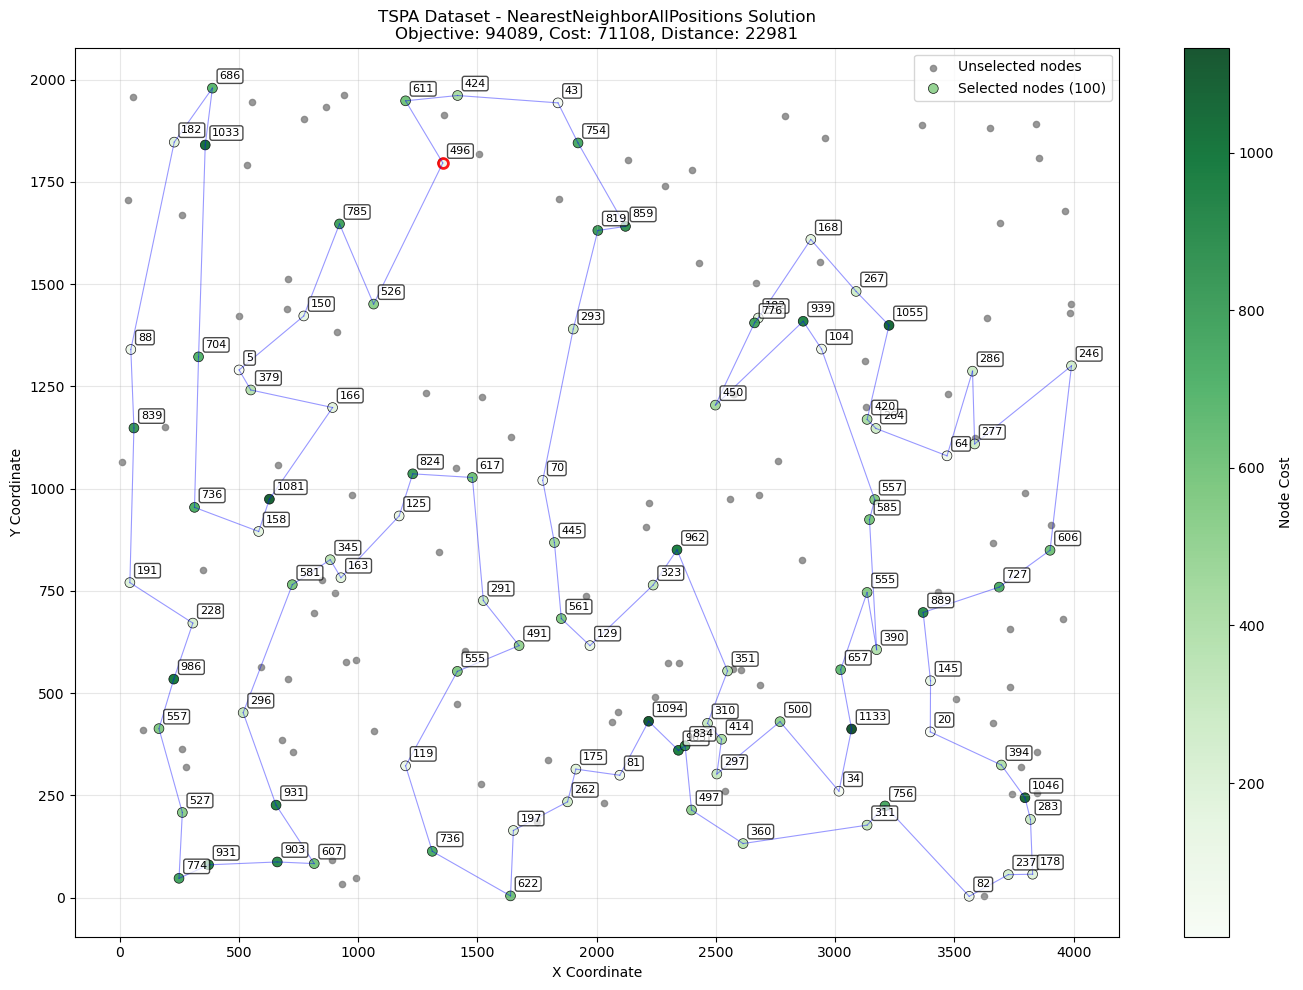

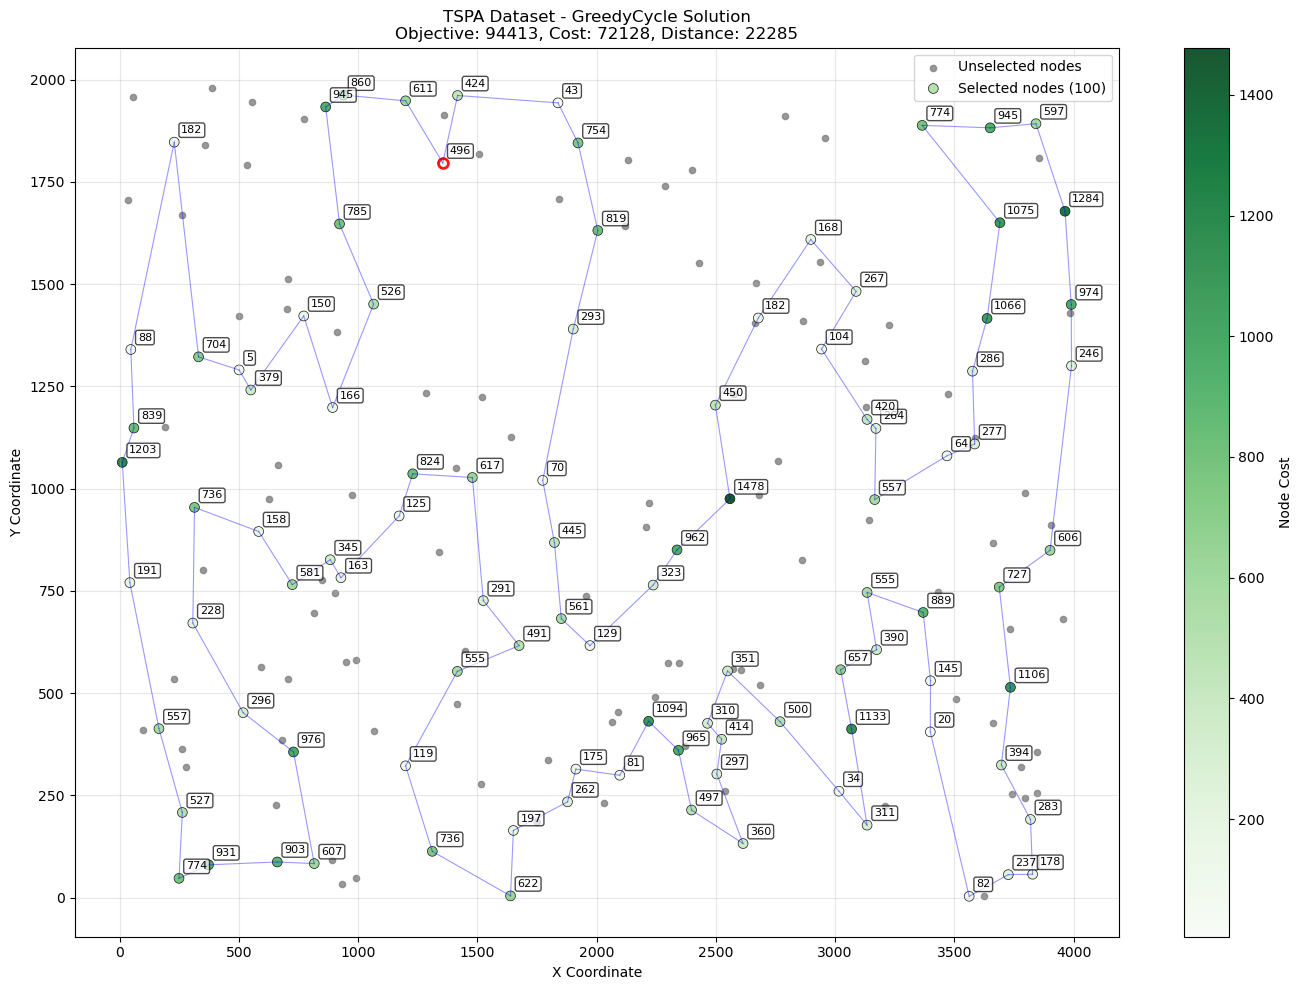

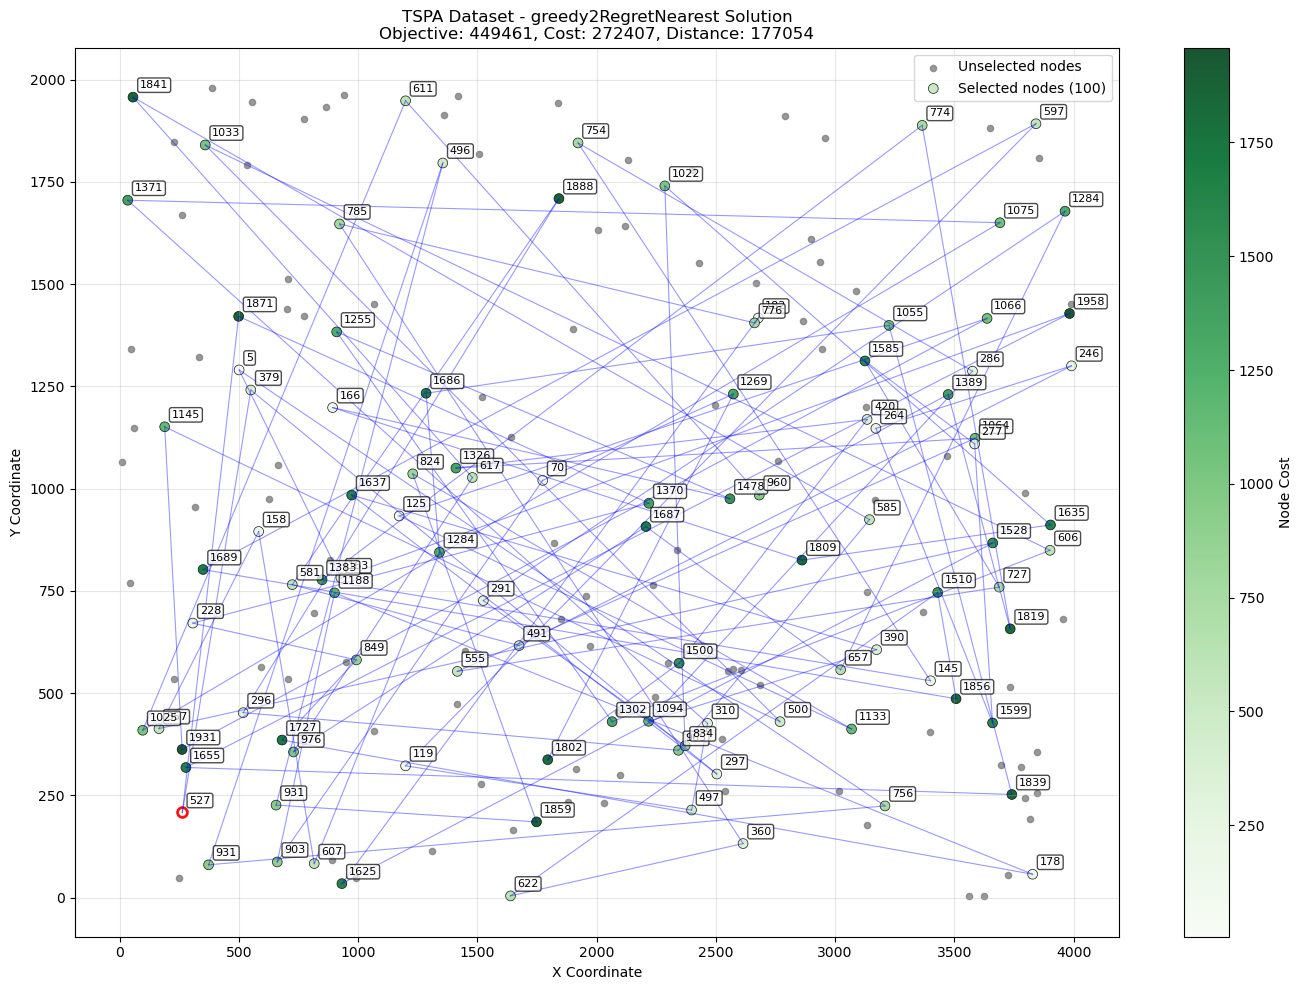

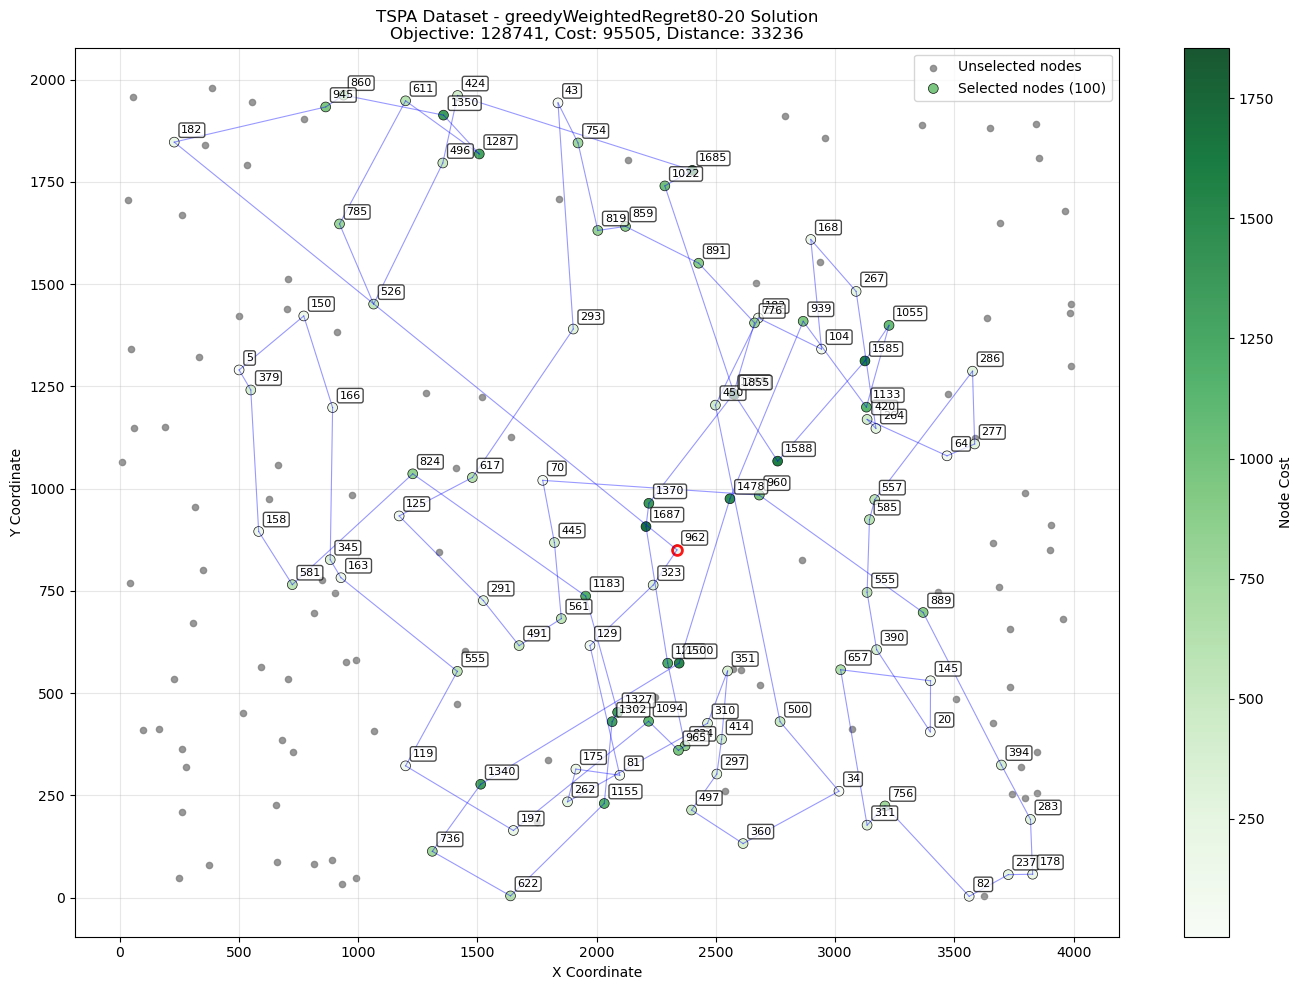

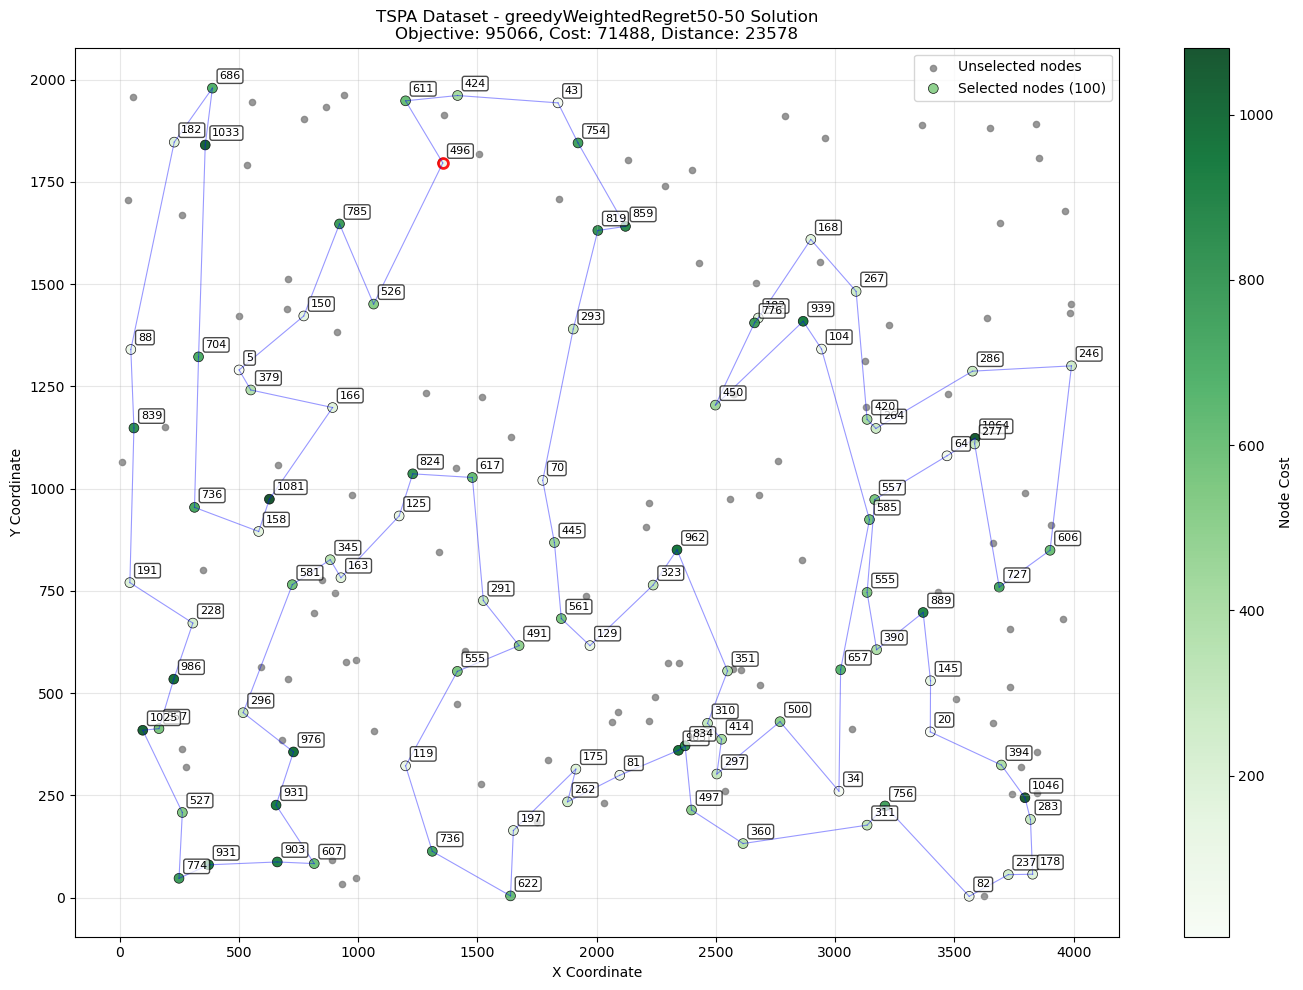

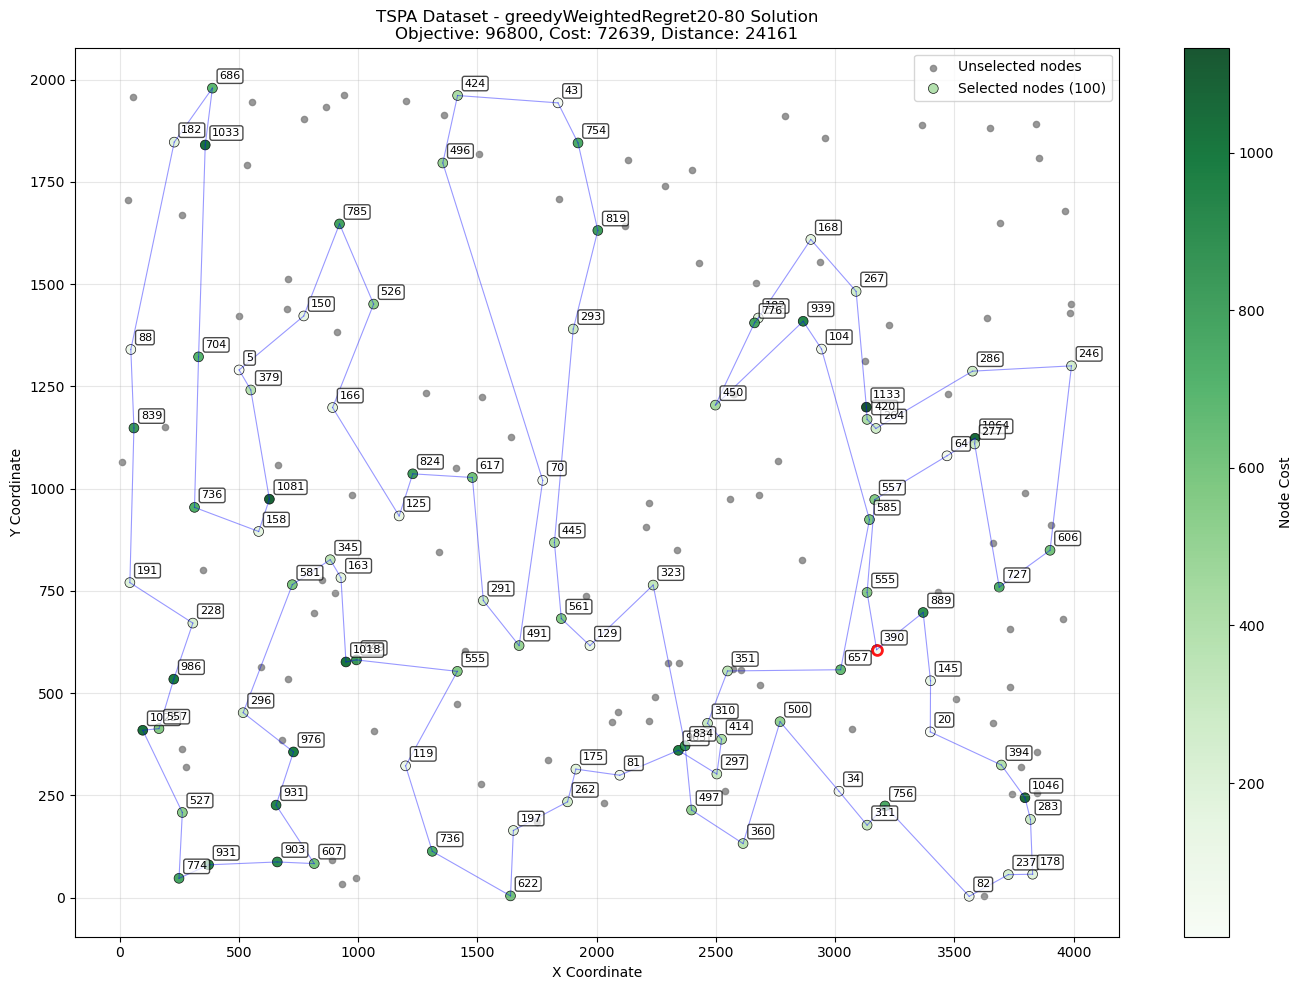

In [55]:
methods = ['RandomSolution', 'NearestNeighborEndOnly', 'NearestNeighborAllPositions', 'GreedyCycle', 'greedy2RegretNearest', 'greedyWeightedRegret80-20', 'greedyWeightedRegret50-50', 'greedyWeightedRegret20-80']
for i, method in enumerate(methods):
    best_solution = solutions_a_final[solutions_a_final.index == i].iloc[0]
    plot_solution('TSPA', method, best_solution)

# Instance B

In [56]:
experiment_summary_b_greedy = pd.read_csv("../Results/GreedyHeuristics/TSPB/experiment_summary.csv")
experiment_summary_b_greedy_regret_2080 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPB_2080/experiment_summary.csv")
experiment_summary_b_greedy_regret_5050 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPB_5050/experiment_summary.csv")
experiment_summary_b_greedy_regret_8020 = pd.read_csv("../Results/GreedyRegretHeuristics/TSPB_8020/experiment_summary.csv")


In [57]:
experiment_summary_b_greedy


Instance                       Method  MinCost  MaxCost    AvgCost  \
0     TSPB               RandomSolution   191728   236268  212747.89   
1     TSPB       NearestNeighborEndOnly    65046    77312   70269.86   
2     TSPB  NearestNeighborAllPositions    49394    57140   51440.19   
3     TSPB                  GreedyCycle    49001    57140   51154.03   

   NumSolutions  BestSolutionID  
0           100              27  
1           100              68  
2           100               2  
3           100              75

In [58]:
experiment_summary_b_greedy_regret_2080

Instance                Method  MinCost  MaxCost   AvgCost  NumSolutions  \
0  TSPB_2080  greedy2RegretNearest    67809    78406  72676.51           100   
1  TSPB_2080  greedyWeightedRegret    48643    53213  50262.86           100   

   BestSolutionID  
0              19  
1              86

In [60]:
experiment_summary_b_greedy_regret_5050

Instance                Method  MinCost  MaxCost   AvgCost  NumSolutions  \
0  TSPB_5050  greedy2RegretNearest    67809    78406  72676.51           100   
1  TSPB_5050  greedyWeightedRegret    47199    55700  51133.70           100   

   BestSolutionID  
0              19  
1              21

In [61]:
methods_to_clean = [experiment_summary_b_greedy_regret_5050, experiment_summary_b_greedy_regret_8020]
for method_df in methods_to_clean:
    method_df.drop(method_df[method_df['Method'] == 'greedy2RegretNearest'].index, inplace=True)

In [62]:
experiment_summary_b_greedy_regret_8020

Instance                Method  MinCost  MaxCost   AvgCost  NumSolutions  \
1  TSPB_8020  greedyWeightedRegret    49950    58067  53981.16           100   

   BestSolutionID  
1              26

In [64]:
experiment_summary_b_combined_regret = pd.concat([experiment_summary_b_greedy_regret_2080, 
                                           experiment_summary_b_greedy_regret_5050, experiment_summary_b_greedy_regret_8020], ignore_index=True)

In [66]:
experiment_summary_b_combined_regret

Instance                Method  MinCost  MaxCost   AvgCost  NumSolutions  \
0  TSPB_2080  greedy2RegretNearest    67809    78406  72676.51           100   
1  TSPB_2080  greedyWeightedRegret    48643    53213  50262.86           100   
2  TSPB_5050  greedyWeightedRegret    47199    55700  51133.70           100   
3  TSPB_8020  greedyWeightedRegret    49950    58067  53981.16           100   

   BestSolutionID  
0              19  
1              86  
2              21  
3              26

In [68]:
solutions_B_heuristics = pd.DataFrame()
for method in experiment_summary_b_greedy['Method'].unique():
    method_data = experiment_summary_b_greedy[experiment_summary_b_greedy['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_heuristics("TSPB", method, best_solution_id)
    solutions_B_heuristics = pd.concat([solutions_B_heuristics, solution], ignore_index=True)

solutions_B_heuristics

RandomSolution: Best Solution ID = 27
NearestNeighborEndOnly: Best Solution ID = 68
NearestNeighborAllPositions: Best Solution ID = 2
GreedyCycle: Best Solution ID = 75


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          27     206107       100         155663             361770   
1          68      75451       100          28159             103610   
2           2      51485       100          19307              70792   
3          75      50243       100          20579              70822   

                                               Cycle  
0  192-4-48-0-172-44-147-150-10-7-91-116-98-57-18...  
1  107-40-63-135-122-133-10-72-100-17-44-90-191-1...  
2  180-176-86-95-128-106-159-143-124-62-83-18-55-...  
3  109-29-189-155-15-3-70-161-145-13-132-169-188-...

In [69]:
def load_solution_regret(instance_name,method, solution_id, weight):
    file_path = f"../Results/GreedyRegretHeuristics/{instance_name}_{weight}/{instance_name}_{weight}_{method}_solutions.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path} does not exist.")
        return None

In [70]:
solutions_B_regret = pd.DataFrame()
for method in experiment_summary_b_combined_regret['Method'].unique():
    method_data = experiment_summary_b_combined_regret[experiment_summary_b_combined_regret['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    weights = ['2080', '5050', '8020']
    for weight in weights:
       print(f"{method}_{weight}: Best Solution ID = {best_solution_id}")
       solution = load_solution_regret("TSPB", method, best_solution_id, weight)
       solutions_B_regret = pd.concat([solutions_B_regret, solution], ignore_index=True)

solutions_B_regret

greedy2RegretNearest_2080: Best Solution ID = 19
greedy2RegretNearest_5050: Best Solution ID = 19
greedy2RegretNearest_8020: Best Solution ID = 19
greedyWeightedRegret_2080: Best Solution ID = 86
greedyWeightedRegret_5050: Best Solution ID = 86
greedyWeightedRegret_8020: Best Solution ID = 86


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          19      67809       100          21430              89239   
1          19      67809       100          21430              89239   
2          19      67809       100          21430              89239   
3          86      48643       100          20495              69138   
4          86      49204       100          20264              69468   
5          86      56640       100          19430              76070   

                                               Cycle  
0  18-34-174-183-9-99-185-179-172-57-66-47-60-20-...  
1  18-34-174-183-9-99-185-179-172-57-66-47-60-20-...  
2  18-34-174-183-9-99-185-179-172-57-66-47-60-20-...  
3  85-51-121-131-135-63-122-133-10-178-90-191-147...  
4  85-74-118-121-51-191-90-131-151-54-31-193-117-...  
5  85-74-118-98-51-116-121-112-19-151-54-31-193-1...

In [71]:
solutions_B_regret = solutions_B_regret.drop([0, 1]).reset_index(drop=True)
solutions_B_regret

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          19      67809       100          21430              89239   
1          86      48643       100          20495              69138   
2          86      49204       100          20264              69468   
3          86      56640       100          19430              76070   

                                               Cycle  
0  18-34-174-183-9-99-185-179-172-57-66-47-60-20-...  
1  85-51-121-131-135-63-122-133-10-178-90-191-147...  
2  85-74-118-121-51-191-90-131-151-54-31-193-117-...  
3  85-74-118-98-51-116-121-112-19-151-54-31-193-1...

In [72]:
solutions_b_final = pd.concat([solutions_B_regret, solutions_B_heuristics], ignore_index=True) 
solutions_b_final

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          19      67809       100          21430              89239   
1          86      48643       100          20495              69138   
2          86      49204       100          20264              69468   
3          86      56640       100          19430              76070   
4          27     206107       100         155663             361770   
5          68      75451       100          28159             103610   
6           2      51485       100          19307              70792   
7          75      50243       100          20579              70822   

                                               Cycle  
0  18-34-174-183-9-99-185-179-172-57-66-47-60-20-...  
1  85-51-121-131-135-63-122-133-10-178-90-191-147...  
2  85-74-118-121-51-191-90-131-151-54-31-193-117-...  
3  85-74-118-98-51-116-121-112-19-151-54-31-193-1...  
4  192-4-48-0-172-44-147-150-10-7-91-116-98-57-18...  
5  107-40-63-135-122-133-10-72-100-17-44-90-191-1...  
6  180-176-86-95-128-106-159-143-124-62-83-18-55-...  
7  109-29-189-155-15-3-70-161-145-13-132-169-188-...

In [73]:
coords = tspb_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

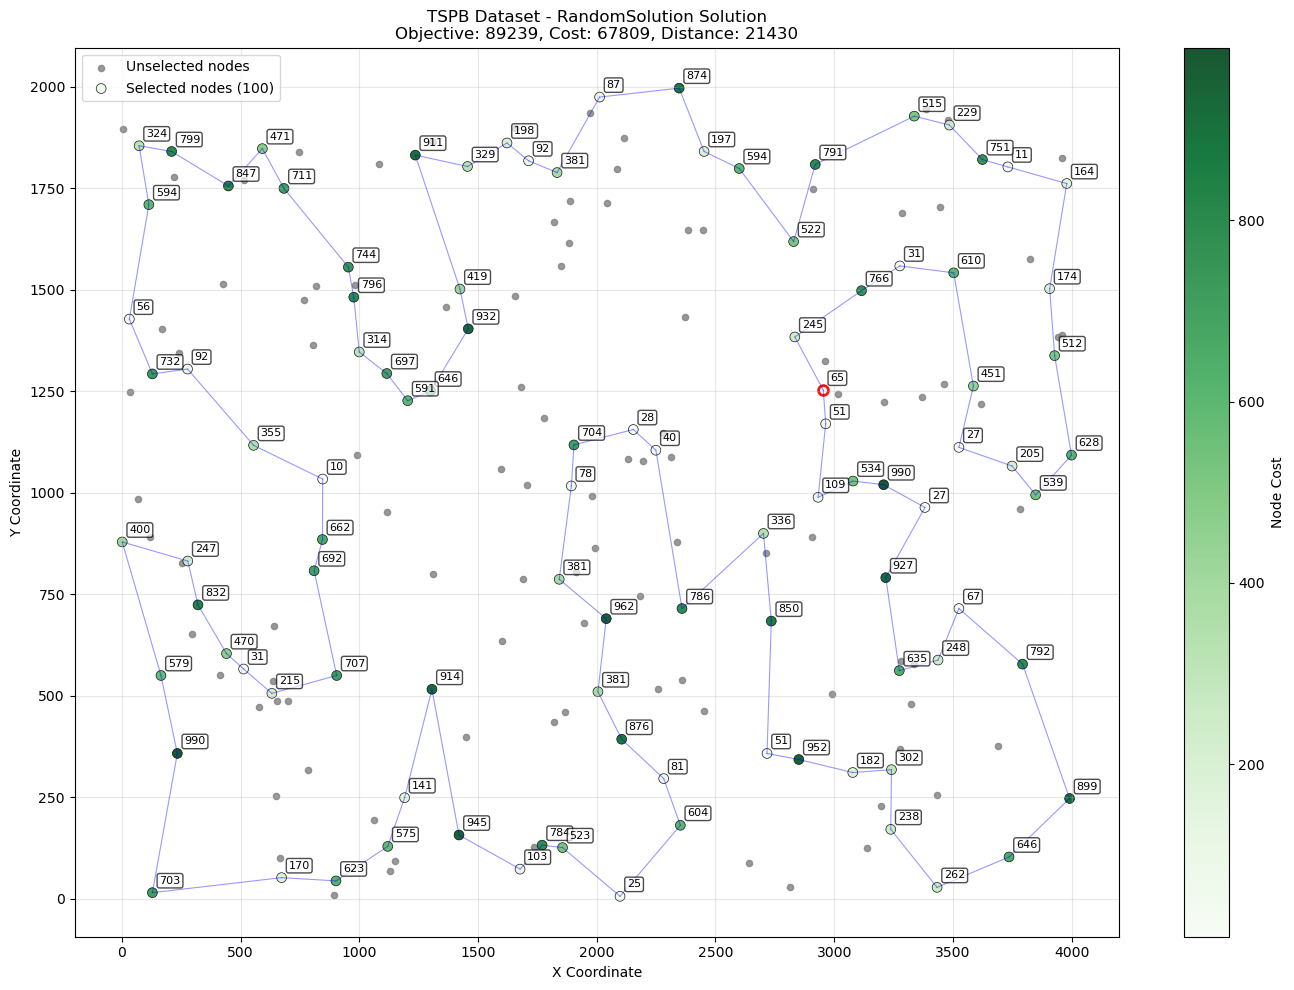

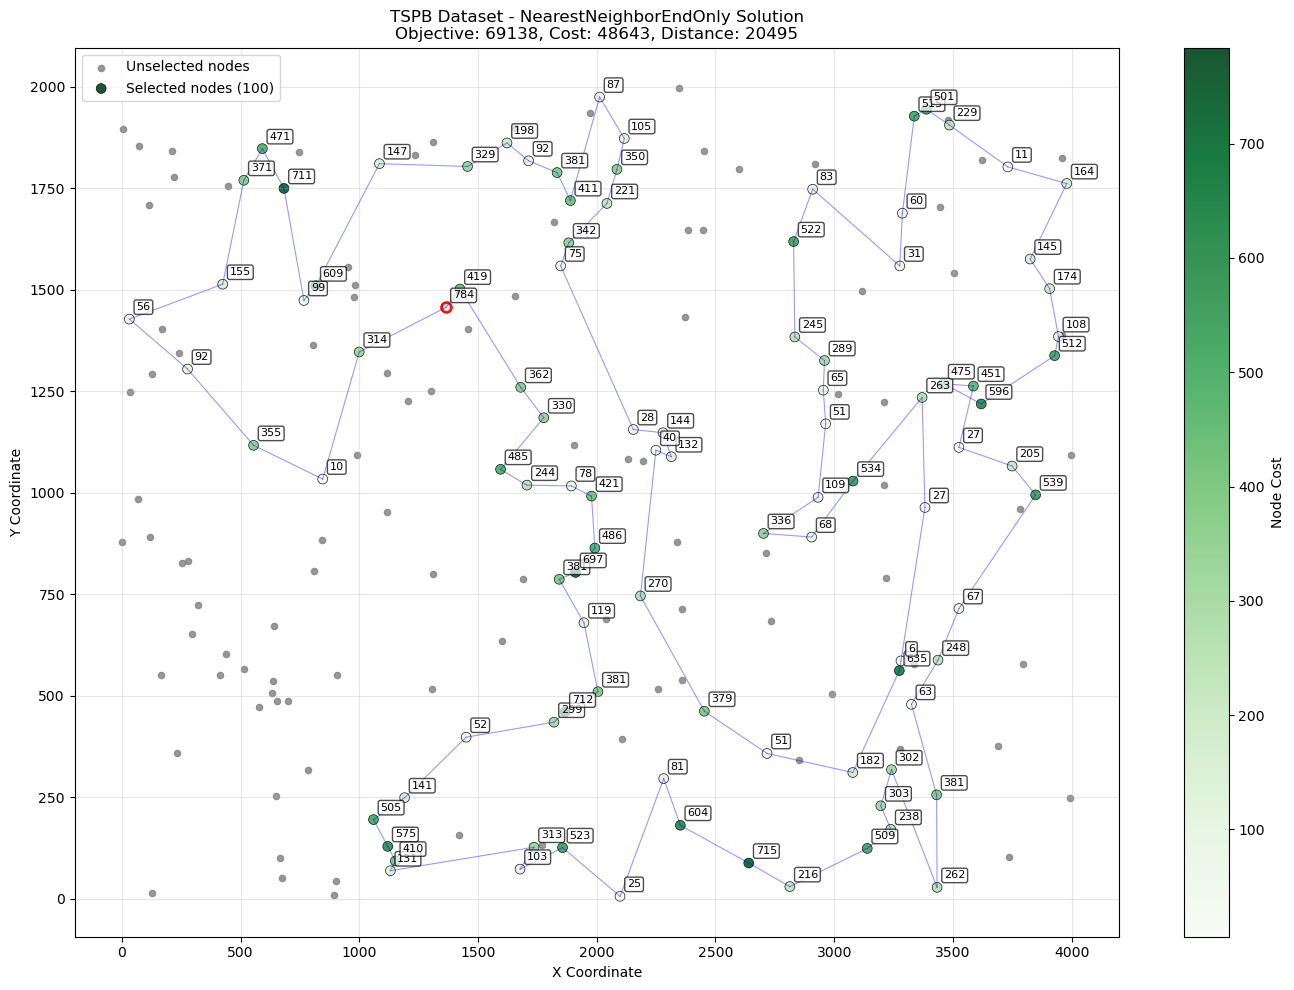

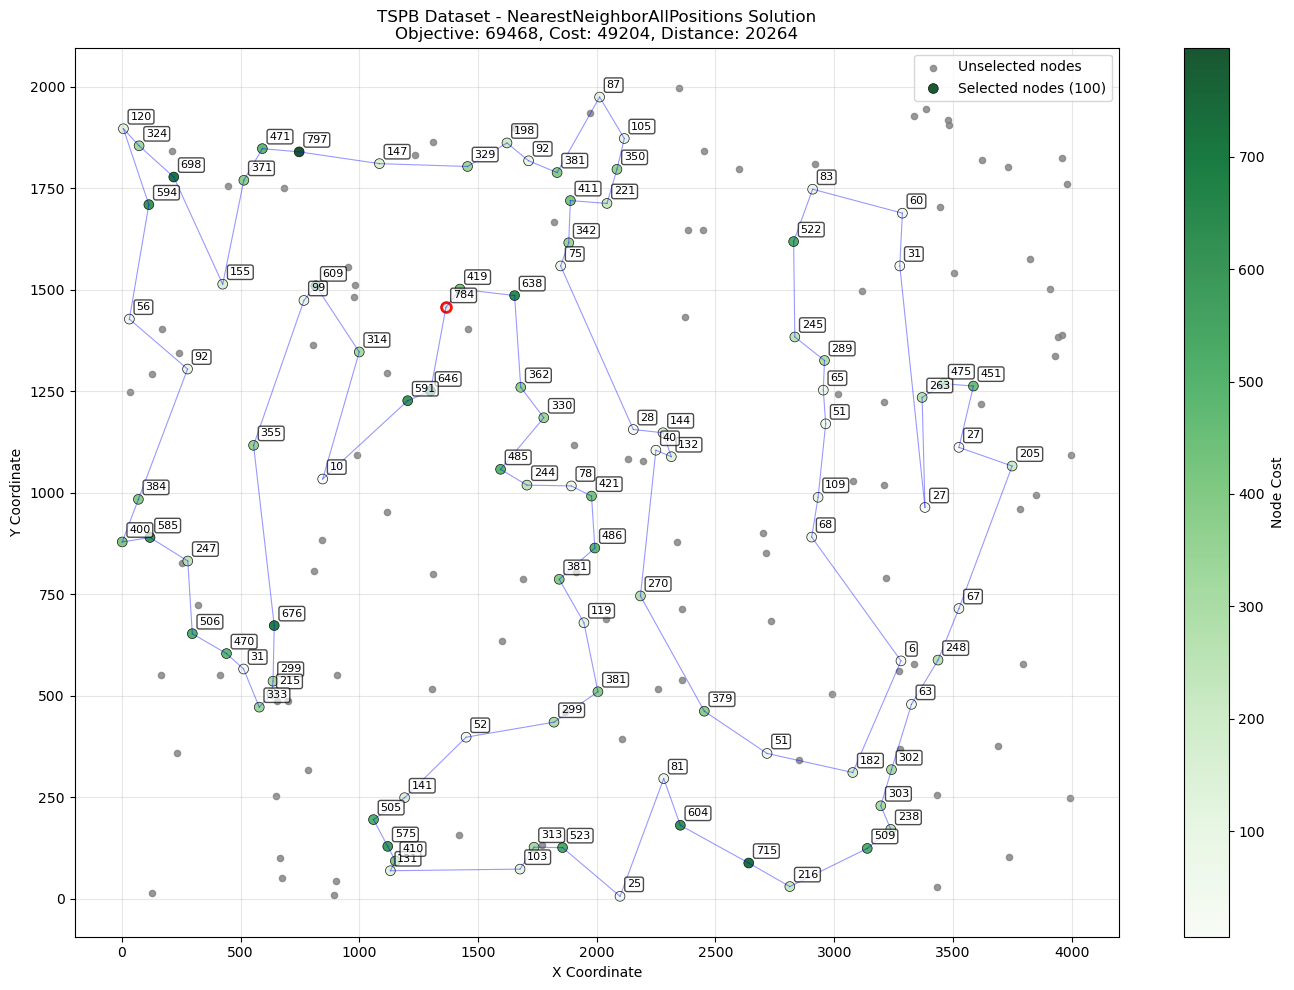

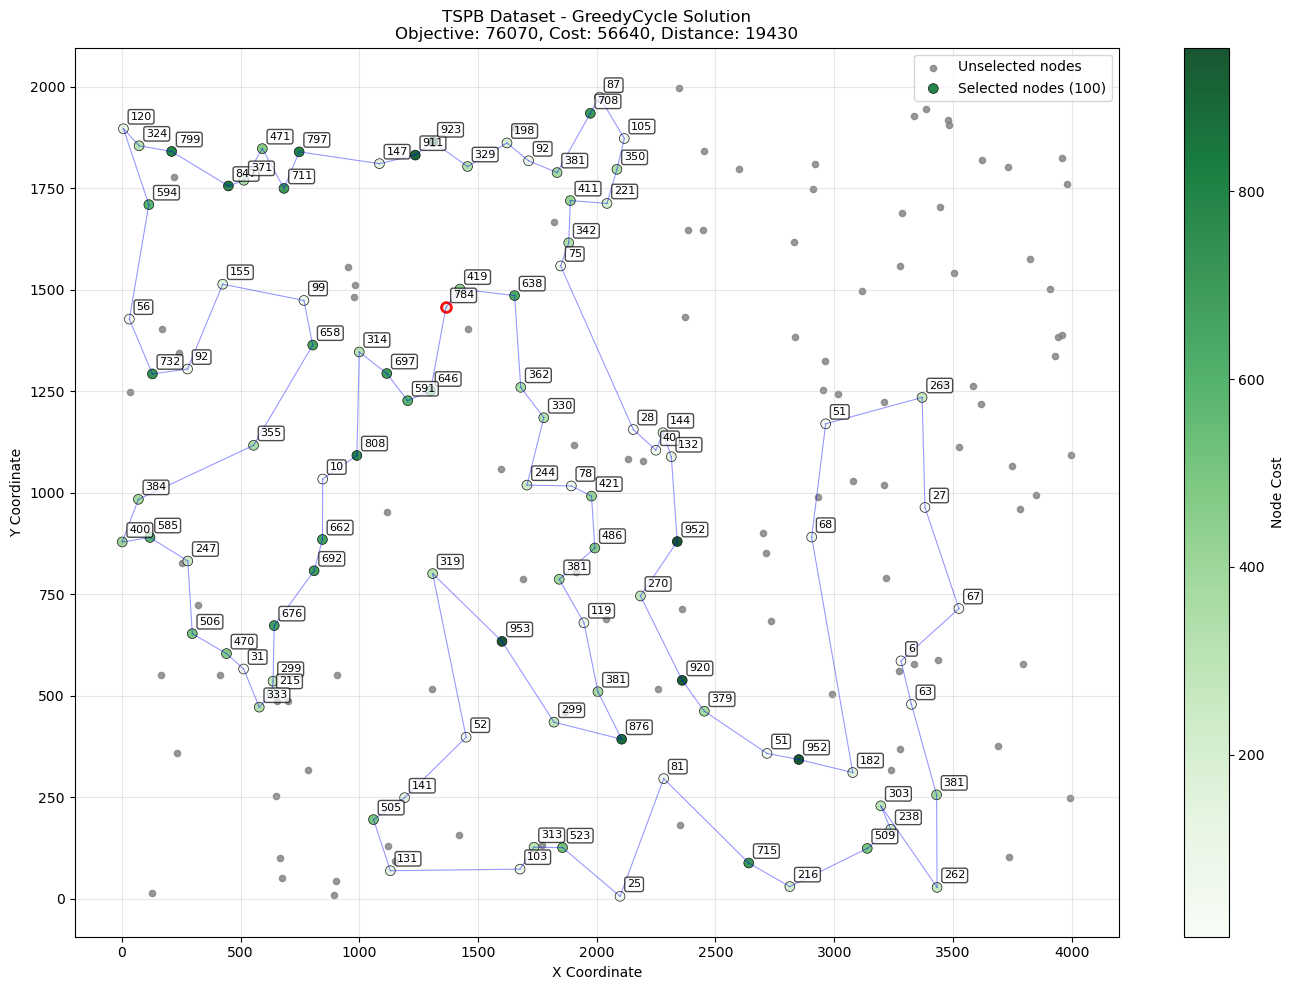

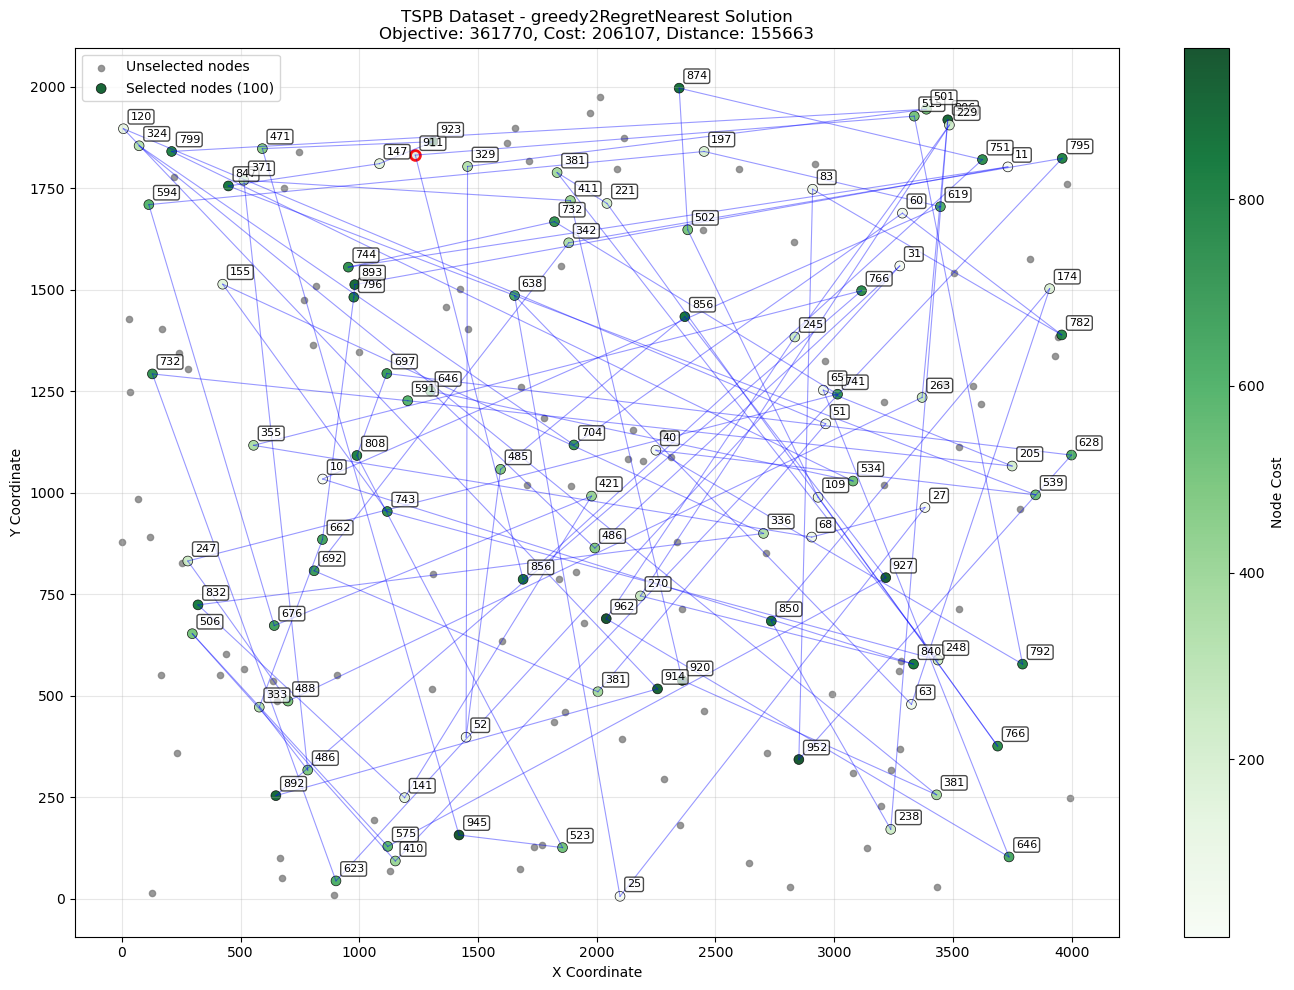

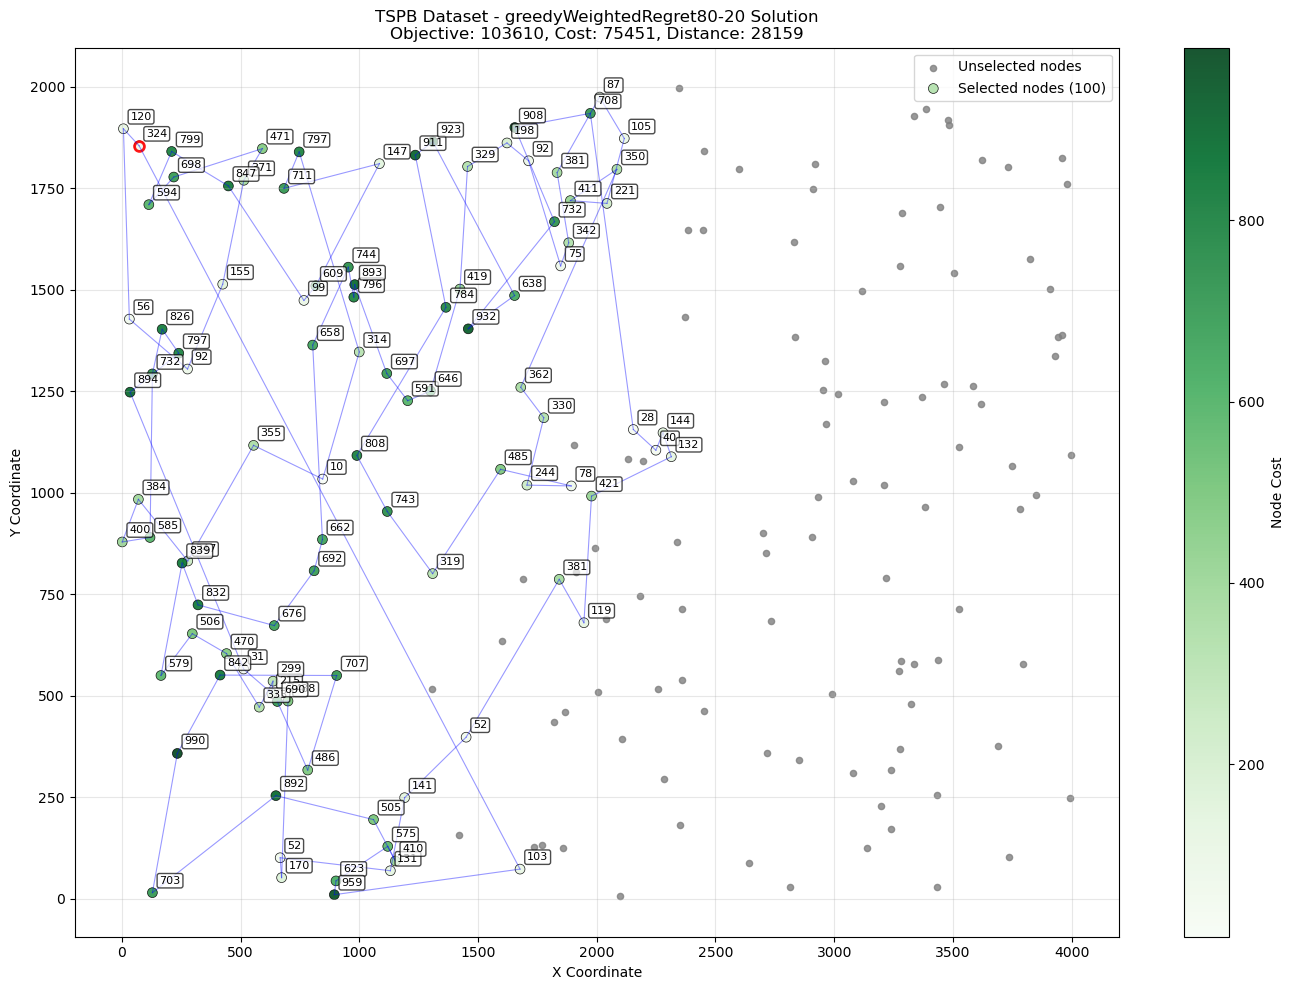

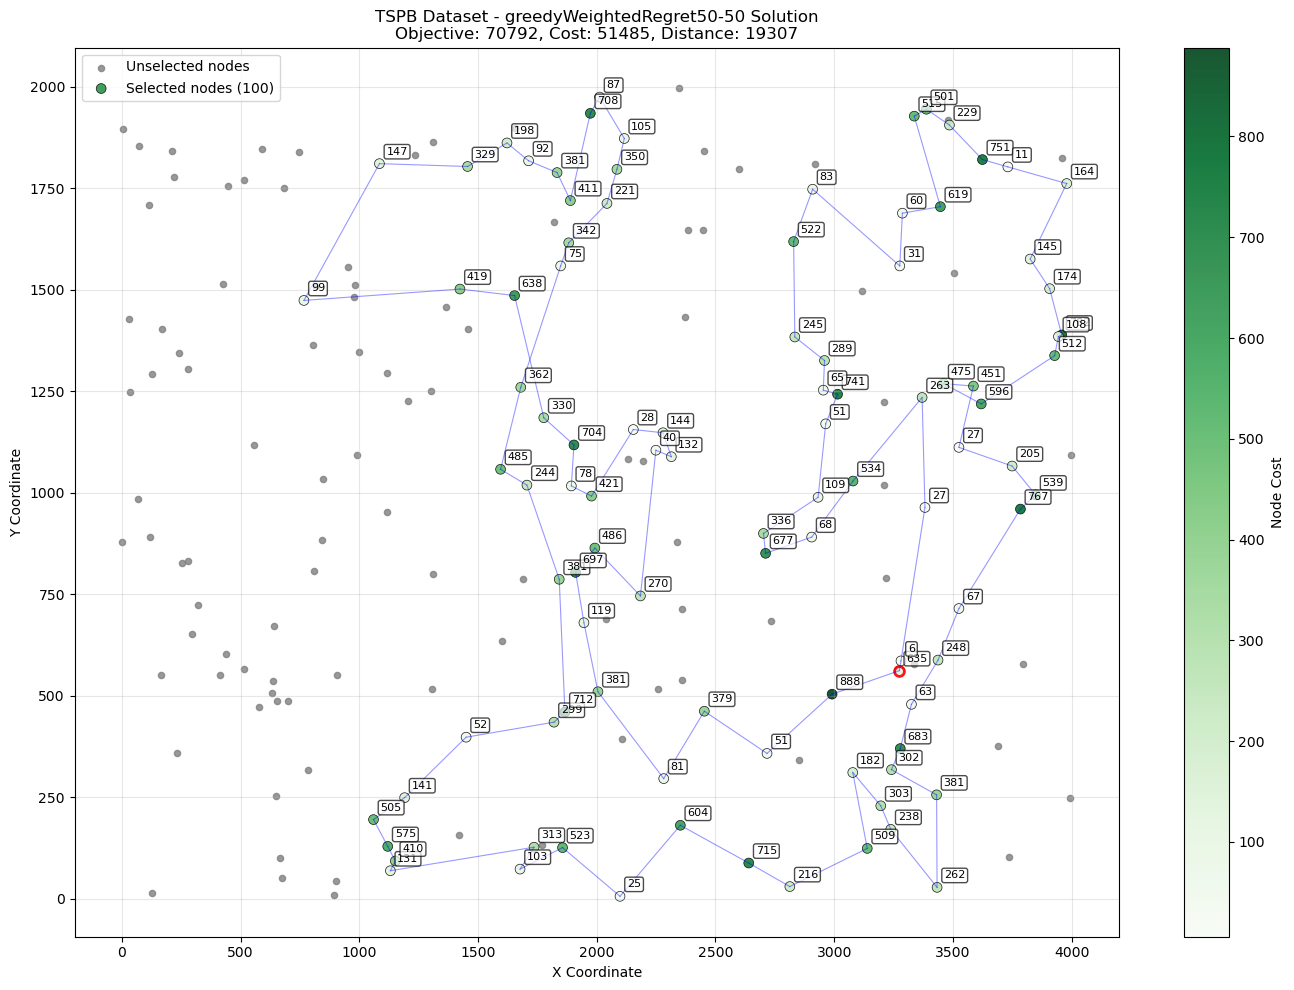

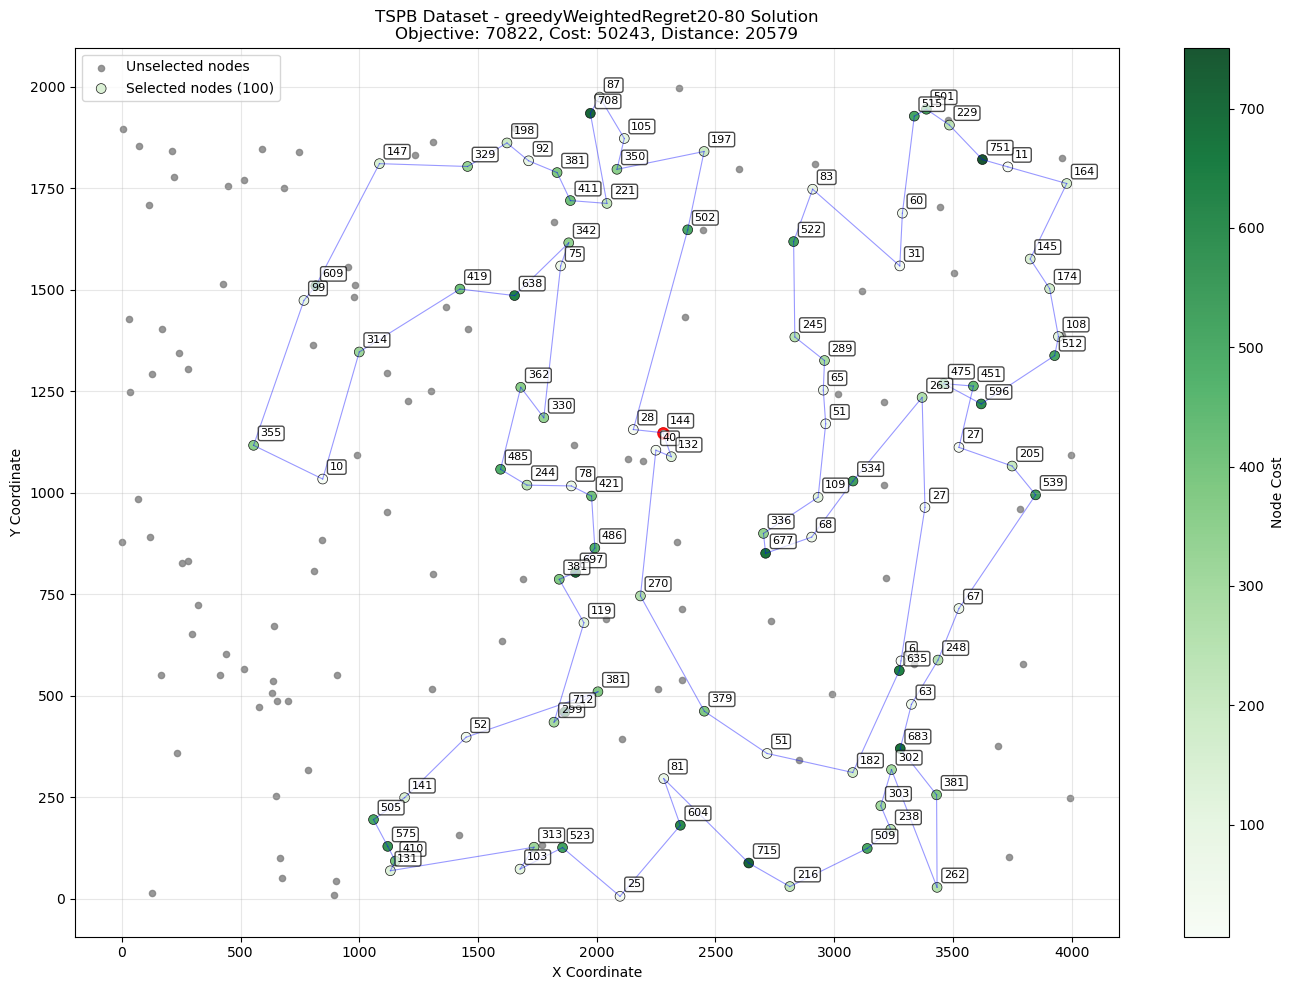

In [74]:
methods = ['RandomSolution', 'NearestNeighborEndOnly', 'NearestNeighborAllPositions', 'GreedyCycle', 'greedy2RegretNearest', 'greedyWeightedRegret80-20', 'greedyWeightedRegret50-50', 'greedyWeightedRegret20-80']
for i, method in enumerate(methods):
    best_solution = solutions_b_final[solutions_b_final.index == i].iloc[0]
    plot_solution('TSPB', method, best_solution)

In [75]:
# Create enhanced comparison table for both instances
comparison_data = []

# Add Instance A data
for i, method in enumerate(methods):
    solution_a = solutions_a_final.iloc[i]
    summary_a = experiment_summary_a_combined_regret[experiment_summary_a_combined_regret['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPA',
        'Method': method,
        'ObjectiveFunction': solution_a['ObjectiveFunction'],
        'TotalDistance': solution_a['TotalDistance'],
        'TotalCost': solution_a['TotalCost'],
        'MinCost': summary_a['MinCost'],
        'MaxCost': summary_a['MaxCost'],
        'AvgCost': summary_a['AvgCost']
    })

# Add Instance B data
for i, method in enumerate(methods):
    solution_b = solutions_b_final.iloc[i]
    summary_b = experiment_summary_b_combined_regret[experiment_summary_b_combined_regret['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPB',
        'Method': method,
        'ObjectiveFunction': solution_b['ObjectiveFunction'],
        'TotalDistance': solution_b['TotalDistance'],
        'TotalCost': solution_b['TotalCost'],
        'MinCost': summary_b['MinCost'],
        'MaxCost': summary_b['MaxCost'],
        'AvgCost': summary_b['AvgCost']
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Create a fancy formatted table
print("=" * 120)
print(f"{'TSP ALGORITHM PERFORMANCE COMPARISON':^120}")
print("=" * 120)

for instance in ['TSPA', 'TSPB']:
    instance_data = comparison_df[comparison_df['Instance'] == instance]
    print(f"\n{f'INSTANCE {instance}':^120}")
    print("-" * 120)
    print(f"{'Method':<25} {'Best Obj':<12} {'Best Dist':<12} {'Best Cost':<12} {'Min Cost':<12} {'Max Cost':<12} {'Avg Cost':<12}")
    print("-" * 120)
    
    for _, row in instance_data.iterrows():
        print(f"{row['Method']:<25} {row['ObjectiveFunction']:<12} {row['TotalDistance']:<12} {row['TotalCost']:<12} "
              f"{row['MinCost']:<12} {row['MaxCost']:<12} {row['AvgCost']:<12.2f}")
    
    print("-" * 120)

print("\n" + "=" * 120)

IndexError: single positional indexer is out-of-bounds